<a href="https://colab.research.google.com/github/alex-bolshunov/Plant-Disease-Detection/blob/main/plant_disease_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from PIL import Image

In [2]:
LBL = "label"
IMG = "image_path"
DGR = "degrees"
SCL = "scale"
CLASSES_NAMES = ("Late Blight", "Early Blight", "Healthy")

In [3]:
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/plants_potatos.csv" -o plants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  16.4M      0 --:--:-- --:--:-- --:--:-- 16.4M


In [4]:
#loat path dataset
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/paths_potatos.csv"  -o paths.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  314k  100  314k    0     0   710k      0 --:--:-- --:--:-- --:--:--  709k


In [5]:
#get dataframe
df = pd.read_csv("plants.csv")
df_path = pd.read_csv("paths.csv")

In [6]:
%%capture

#mount drive
drive.mount('/content/drive')

In [7]:
#get classes
classes = df.loc[:, LBL].unique().tolist()

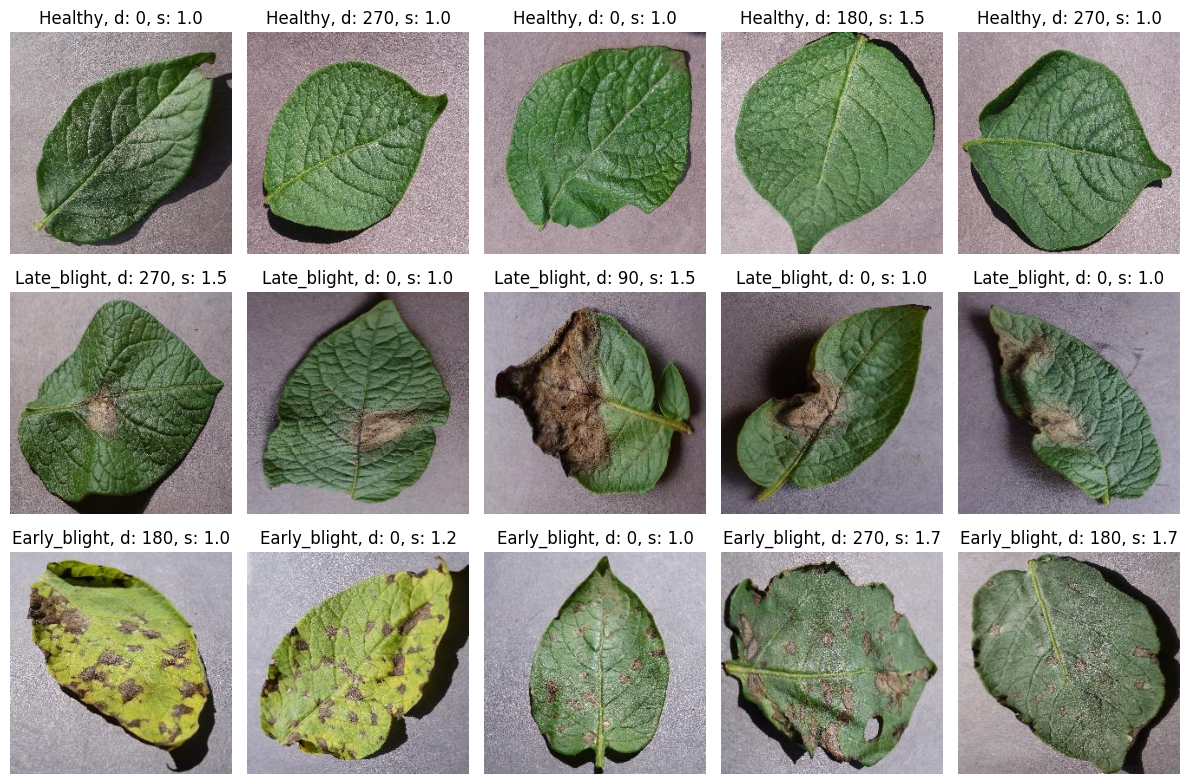

In [8]:
#define variables
num_img = 5
num_rows = len(classes)

pic_num = 0
class_index = 0
h = 20

#plot random set of pictures, each row represents a class
# fig, axes = plt.subplots(num_rows, num_img, figsize = (h*2.4,h))
fig, axes = plt.subplots(num_rows, num_img, figsize = (12,8))
fig.subplots_adjust(hspace=0.3)

for ax in axes.flat:
  if (pic_num + 1) / num_img > class_index + 1: class_index += 1 #update class index
  img_index = np.random.choice(df_path.loc[df_path[LBL] == classes[class_index]].index)

  #print(img_index)
  img_path = df_path.loc[img_index, IMG]
  title = df_path.loc[img_index, LBL][9:].capitalize()
  degree = df_path.loc[img_index, DGR]
  scale = df_path.loc[img_index, SCL]

  img = Image.open(img_path).rotate(degree, expand= True)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"{title}, d: {degree}, s: {scale}")
  pic_num += 1

plt.tight_layout()
plt.savefig("leaves.jpg", dpi=300)
plt.show()

In [9]:
is_rotated = df_path[DGR] != 0
is_scaled = df_path[SCL] != 1

num_rotated = df_path.loc[is_rotated].shape[0]
num_scaled = df_path.loc[is_scaled].shape[0]
num_rotated_scaled = df_path.loc[is_rotated & is_scaled].shape[0]

In [10]:
print(f"Number of ratated pictures: {num_rotated}")
print(f"Number of scaled pictures: {num_scaled}")
print(f"Number of ratated and scaled pictures: {num_rotated_scaled}")

Number of ratated pictures: 1051
Number of scaled pictures: 1053
Number of ratated and scaled pictures: 523
